In [0]:
!pip install gym
!apt-get update
!apt-get -qq -y install xvfb freeglut3-dev ffmpeg> /dev/null
!apt-get install xvfb
!pip install pyvirtualdisplay
!pip -q install pyglet
!pip -q install pyopengl

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [300 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic/main amd64 Packages [27.2 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates/main 

In [0]:
!apt-get install swig
!pip install box2d box2d-kengz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
    100% |████████████████████████████████| 430kB 8.2MB/s 
    100% |████████████████████████████████| 430kB 23.4MB/s 
  Running setup.py bdist_wheel for box2d ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/35/09/fd/054e73da7184a08071ed889bf45772719c7bb6d2dd13f166a1
  Running setup.py bdist_wheel for box2d-kengz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
 

In [0]:
# Start virtual display
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

In [0]:
!pip install pybullet

    100% |████████████████████████████████| 27.6MB 1.5MB/s 
  Running setup.py bdist_wheel for pybullet ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [0]:
import os
import numpy as np
import gym
from gym import wrappers

In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

tcmalloc: large alloc 1073750016 bytes == 0x5bac8000 @  0x7f8a4a46a2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
0.4.0
True


In [0]:


import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import FloatTensor, LongTensor

import gym
np.random.seed(42)

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline



In [0]:
env = gym.make('LunarLander-v2')
env.reset()

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


array([ 0.00729551,  1.4119292 ,  0.7389406 ,  0.04482597, -0.00844689,
       -0.1673812 ,  0.        ,  0.        ], dtype=float32)

In [0]:
class Lander(nn.Module):
    def __init__(self, env, num_env_actions, num_env_variables):
        super().__init__()
        self.env = env
        self.num_env_actions = num_env_actions
        self.num_env_variables = num_env_variables
        self.memoryX = np.zeros(1)
        self.memoryY = np.zeros(1)
        self.criterion = nn.MSELoss()
        self.optimizer = None
        
        self.net = Sequential(
            nn.Linear(num_env_actions + num_env_variables, 512),
            nn.Linear(512, 256), 
            nn.ReLU(),
            nn.Linear(256, 256), 
            nn.ReLU(),
            nn.Linear(256, 1)
        )

    def forward(self, inputs):
        return self.net(x)
    
    def one_hot(self, action):
        result = np.zeros(self.num_env_actions)
        result[action] = 1
        return result

    def predict_total_reward(self, state, action):
        state_action = np.concatenate((state, self.one_hot(action)), axis = 0)
        total_reward = self.forward(FloatTensor(state_action.reshape(1, -1))).view(self.forward(FloatTensor(state_action.reshape(1, -1))).numel())
        #print("rew= " total_reward)
        
        return total_reward

    def random_action(self):
        return self.env.action_space.sample()

    def normal_action(self, state):
        possible_action = np.array([self.predict_total_reward(state, i) for i in range(self.num_env_actions)])
        return np.argmax(possible_action)

    def get_action(self, state, explore = 0.5, observe = False):
        if observe:
            return self.random_action()
        prob = np.random.rand(1)
        if prob > explore:
            return self.random_action()
        return self.normal_action(state)

    def play_game(self, observe = False, explore = 0.5, gamma = 0.99, render = False):
        gameX = np.zeros(shape=(1,num_env_variables+num_env_actions))
        gameY = np.zeros(shape=(1,1))
        state = self.env.reset()
        done = False
        step = 0
        total_reward = 0
        while not done:
            action = self.get_action(state, explore, observe)
            if render:
                env.render()
            state_action = np.concatenate((state, self.one_hot(action)), axis = 0)
            state, reward, done, info = self.env.step(action)
            total_reward += reward
            
            if step == 0:
                gameX[0] = state_action
                gameY[0] = np.array([reward])
            else:
#                 print(gameX.shape)
                gameX = np.vstack((gameX, state_action))
                gameY = np.vstack((gameY, np.array([reward])))
#                 print(gameX.shape)
#                 print('gameX', gameX)
            step += 1
        for i in range(0,gameY.shape[0]):
            if i > 0:
                gameY[(gameY.shape[0]-1)-i][0] = gameY[(gameY.shape[0]-1)-i][0] + gamma * gameY[(gameY.shape[0]-1) - i + 1][0]
        print()
        return np.array(gameX), np.array(gameY), total_reward
    
    def update_memory(self, gameX, gameY):
        if self.memoryX.shape[0] == 1:
            self.memoryX = gameX
            self.memoryY = gameY
        else:
            self.memoryX = np.concatenate((self.memoryX, gameX), axis=0)
            self.memoryY = np.concatenate((self.memoryY, gameY), axis=0)
        max_memory = 10000
        if len(self.memoryX > max_memory):
            self.memoryX = self.memoryX[-max_memory:]
            self.memoryY = self.memoryY[-max_memory:]
            
    def train(self):
        if self.optimizer is None:
            self.optimizer = optim.Adam(self.parameters(), lr=1e-5)
        with torch.autograd.set_grad_enabled(True):
            for i in range(12):
                batch_ids = np.random.choice(len(self.memoryX), 512)
                batch = self.memoryX[batch_ids]
                target = self.memoryY[batch_ids]
                prediction = self.forward(FloatTensor(batch))
                loss = self.criterion(prediction, FloatTensor(target))
                loss.backward()
                self.optimizer.step()
                self.optimizer.zero_grad()
            
    
    def train_model(self, steps, observe=False, explore=0.5, gamma=0.99, render=False):
        for i in range(steps):
            gameX, gameY, _ = self.play_game(observe, explore, gamma, render)
            self.update_memory(gameX, gameY)
            if not observe:
                self.train()

In [0]:
num_env_variables = 8
num_env_actions = 4
model = Lander(env, num_env_actions, num_env_variables)

In [0]:
model.train_model(2500 observe=True)
model.train_model(3000, explore = 0.2, render=False, gamma=0.99)
model.train_model(5000, explore = 0.5, render=False, gamma=0.99) # sleeeeeeeeep
model.train_model(2000, explore = 0.9, render=False, gamma=0.99) 

amount of iter: 100
mean reward: 230.21175507107455
Successes:  100


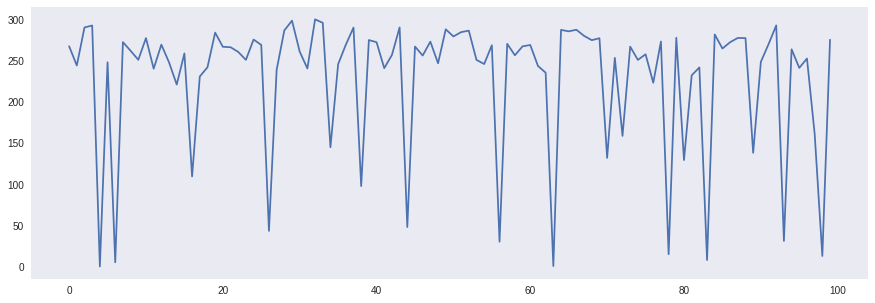

In [0]:

rewards = []
num_iters = 100
for i in range(num_iters):
    game_x, game_y, total = model.play_game(explore = 1, render = False)
    rewards.append(total)
plt.figure(figsize=(15,5))
plt.plot(rewards)
plt.grid()
print("amount of iter:",  num_iters)
print('mean reward:', np.mean(rewards))

print('Successes: ', str(np.sum([1 if item > 0 else 0 for item in rewards])))
